1. How many rows are there in this dataset? How many columns?

In [1]:
import pandas as pd
df = pd.read_csv("train.csv")
df.shape
#There are 891 rows and 12 columns

(891, 12)

2. Out of all passengers, how many survived?

In [2]:
survived = df[df.Survived == 1].sum()
survived.Survived
#342 passengers survived

342

3. Who had more chance of surviving: male passengers or female passengers (see the Sex column)?
Show a plot which confirms the previous answer.


In [3]:
male_stats = df[df.Sex == 'male']
total_male = male_stats.shape[0]
male_survived = male_stats.Survived.sum()
male_percentage = male_survived/total_male * 100


female_stats = df[df.Sex == 'female']
total_female = female_stats.shape[0]
female_survived = female_stats.Survived.sum()
female_percentage = female_survived/total_female * 100
female_percentage, male_percentage
# women had a 74% chance of survival, while men had a 18% chance






(74.20382165605095, 18.890814558058924)

In [4]:
import matplotlib.pyplot as plt
df2 = df.copy()
df2.Survived = df2.Survived.replace(
    {
        0:"Did not Survive",
        1:"Survived"
    })
male_stats2 = df2[df2.Sex == 'male']
male_plot = male_stats2.Survived.value_counts().plot.pie();
male_plot
plt.title('Male Survival')
plt.ylabel('')

Text(0, 0.5, '')

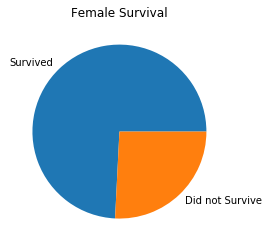

In [5]:
df2.Survived = df2.Survived.replace(
    {
        0:"Did not Survive",
        1:"Survived"
    })

female_stats2 = df2[df2.Sex == 'female']
female_plot = female_stats2.Survived.value_counts().plot.pie();
plt.title('Female Survival')
plt.ylabel('')
female_plot



4. From the three classes of passengers (first class, second class and third class - in the Pclass column), which had more chance of surviving?
Show a plot which confirms the previous answer.


In [6]:
first_class_stats = df[df.Pclass == 1]
total_first_class = first_class_stats.shape[0]
first_class_survived = first_class_stats.Survived.sum()
first_class_percentage = first_class_survived/total_first_class * 100
first_class_percentage

second_class_stats = df[df.Pclass == 2]
total_second_class = second_class_stats.shape[0]
second_class_survived = second_class_stats.Survived.sum()
second_class_percentage = second_class_survived/total_first_class * 100
second_class_percentage

third_class_stats = df[df.Pclass == 3]
total_third_class = third_class_stats.shape[0]
third_class_survived = third_class_stats.Survived.sum()
third_class_percentage = third_class_survived/total_third_class * 100
first_class_percentage, second_class_percentage, third_class_percentage

#First Class had the higest chance of survival

(62.96296296296296, 40.27777777777778, 24.236252545824847)

Text(0, 0.5, '')

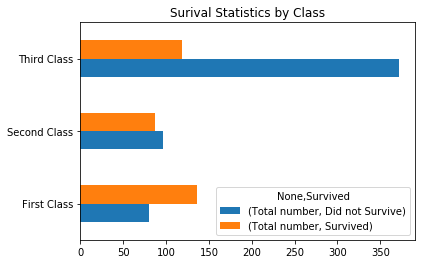

In [7]:
df2.Pclass = df2.Pclass.replace(
    {
      
        3: "Third Class",
        2: "Second Class",
        1: "First Class"
        
    })
df2["Total number"] = pd.Series([1]*891)
df2
pivot1 = pd.pivot_table(df2, index="Pclass", 
                   columns="Survived", values=["Total number"], aggfunc = sum)

pivot1.plot.barh();
plt.title("Surival Statistics by Class")
plt.ylabel("")


   


5. Make a histogram of the prices paid for the tickets (in the fare column).


Text(0.5, 1.0, 'Histogram of Fare Prices')

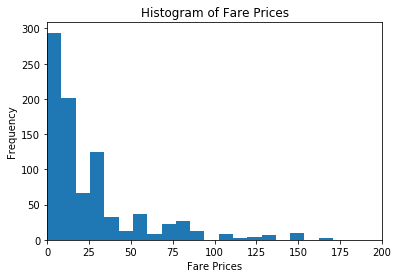

In [8]:
df.Fare.plot.hist(bins = 60 , xlim = (0,200));
plt.xlabel("Fare Prices")
plt.title("Histogram of Fare Prices")
#this is a histogram with all the revelant information

Text(0.5, 1.0, 'Histogram of Fare Prices')

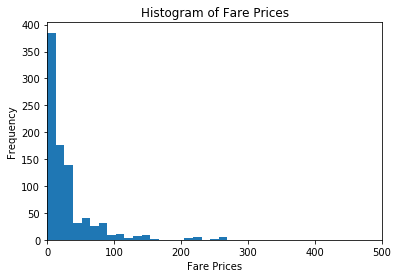

In [9]:
df.Fare.plot.hist(bins = 40 , xlim = (0,500));
plt.xlabel("Fare Prices")
plt.title("Histogram of Fare Prices")
#this is a histogram with all info, even the outliers

In [10]:
under_ten = df[df.Fare <10]
list(under_ten.Name)

['Braund, Mr. Owen Harris',
 'Heikkinen, Miss. Laina',
 'Allen, Mr. William Henry',
 'Moran, Mr. James',
 'Saundercock, Mr. William Henry',
 'Vestrom, Miss. Hulda Amanda Adolfina',
 'Masselmani, Mrs. Fatima',
 'McGowan, Miss. Anna "Annie"',
 'Emir, Mr. Farred Chehab',
 'O\'Dwyer, Miss. Ellen "Nellie"',
 'Todoroff, Mr. Lalio',
 'Glynn, Miss. Mary Agatha',
 'Mamee, Mr. Hanna',
 'Cann, Mr. Ernest Charles',
 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
 'Kraeff, Mr. Theodor',
 'Devaney, Miss. Margaret Delia',
 'Rogers, Mr. William John',
 "O'Driscoll, Miss. Bridget",
 'Nosworthy, Mr. Richard Cater',
 'Novel, Mr. Mansouer',
 'Sirayanian, Mr. Orsen',
 'Crease, Mr. Ernest James',
 'Andersson, Miss. Erna Alexandra',
 'Kink, Mr. Vincenz',
 'Moen, Mr. Sigurd Hansen',
 'Staneff, Mr. Ivan',
 'Moutal, Mr. Rahamin Haim',
 'Waelens, Mr. Achille',
 'Sheerlinck, Mr. Jan Baptist',
 'McDermott, Miss. Brigdet Delia',
 'Slocovski, Mr. Selman Francis',
 'Celotti, Mr. Francesco',
 'Christmann, Mr. Emil'

PART II
Within your titanic dataframe, create a new column called "life_stage", which contains the life stage for each person in the data set

In [11]:
stage_list = df.Age.to_list()
list1= []
for n in stage_list:
    if n <= 6:
        list1.append("Early Childhood")
    elif n <= 11 and n > 6:
        list1.append("Childhood")
    elif n <= 19 and n > 11:
        list1.append("Adolescence")
    elif n<= 35 and n > 19:
        list1.append("Early Adulthood")
    elif n<= 55 and n > 35:
        list1.append("Midlife")
    elif n<= 56:
        list1.append("Mature Adulthood")
    else:
        list1.append("Age not known")
list1

df["life_stage"] = list1
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,life_stage
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Early Adulthood
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Midlife
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Early Adulthood
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Early Adulthood
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Early Adulthood
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Age not known
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Midlife
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Early Childhood
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Early Adulthood
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Adolescence


make a barplot for the survival chance of each life stage category

Text(0, 0.5, 'Gender and age')

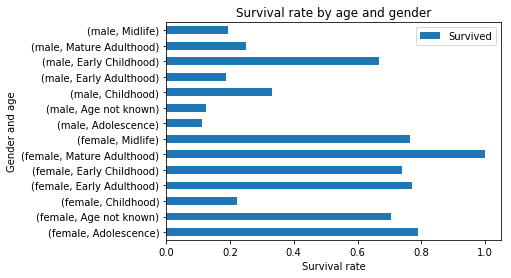

In [12]:
chartable = df.groupby(["Sex","life_stage"])[["Survived"]].mean() 
chartable.plot.barh()
plt.title("Survival rate by age and gender")
plt.xlabel("Survival rate")
plt.ylabel("Gender and age")

Simulate the survived column

In [13]:
dff1 = df[(df.Sex =="female") & (df.Survived == 1)]
survived_females = dff1.shape[0]
dff2 =  df[(df.Sex =="female") & (df.Survived == 0)]
dead_females = dff2.shape[0]
survived_list = ["Survived simulation"]
dead_list = ["Did Not Survive simulation"]
female_simm = survived_list*survived_females + dead_list*dead_females

dfm1 = df[(df.Sex =="male") & (df.Survived == 1)]
survived_males = dfm1.shape[0]
dfm2 =  df[(df.Sex =="male") & (df.Survived == 0)]
dead_males = dfm2.shape[0]
male_simm = survived_list*survived_males + dead_list*dead_males

from random import shuffle
shuffle(male_simm)
shuffle(female_simm)

df

list3 = list(df.Sex)
ls = []
for n in list3:
    if n == "male":
        ls.append(male_simm[0])
        male_simm = male_simm[1:len(male_simm)]
    else:
        ls.append(female_simm[0])
        female_simm = female_simm[1:len(female_simm)]
     
        
df['Survival Simulation'] = ls
df








,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,life_stage,Survival Simulation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Early Adulthood,Did Not Survive simulation
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Midlife,Survived simulation
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Early Adulthood,Survived simulation
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Early Adulthood,Survived simulation
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Early Adulthood,Did Not Survive simulation
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Age not known,Survived simulation
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Midlife,Did Not Survive simulation
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Early Childhood,Did Not Survive simulation
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Early Adulthood,Did Not Survive simulation
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Adolescence,Survived simulation


PART III
Transform the dataset so it shows only the rows where salary is not equal to zero

In [14]:
import pandas as pd
mon = pd.read_csv("monster_com-job_sample.csv")
mon = mon[mon.salary.notnull()]
mon

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
13,United States of America,US,NaN,No,jobs.monster.com,Launch your teaching career with the Leader in...,Primrose Private Preschool Teacher Job in Houston,Full Time,"Houston, TX 77098",Education,http://jobview.monster.com/Primrose-Private-Pr...,9.00 - 13.00 $ /hour,Entry Level,b43c077756d5a326c4854e1399fd2464
14,United States of America,US,NaN,No,jobs.monster.com,Construction Professional For more than 15 yea...,Superintendent Job in Houston,Full Time Employee,"Houston, TX",Construction - Industrial Facilities and Infra...,http://jobview.monster.com/Superintendent-Job-...,"80,000.00 - 95,000.00 $ /year",Building Construction/Skilled Trades,d8491fcefe14d1398de419984dccf427
19,United States of America,US,NaN,No,jobs.monster.com,"Competitive compensation package, excellent co...",Technician - Robot & Multi-Axis CNC Field Serv...,Full Time,"Carter Lake, IA 51510",NaN,http://jobview.monster.com/Technician-Robot-Mu...,"60,000.00 - 72,000.00 $ /year",Experienced (Non-Manager),3bef462fc38d743c7fbce17cf50ee7d5
23,United States of America,US,NaN,No,jobs.monster.com,"Well respected, rapidly growing, and expandin...",Estimator - Construction Job in Denver,Full Time,"Denver, CO 80215",NaN,http://jobview.monster.com/Estimator-Construct...,Excellent Pay and Incentives,NaN,c552f63b5497f720942aaf943d629b1c
29,United States of America,US,NaN,No,jobs.monster.com,Experis is working with a Pharmaceutical start...,Sr. Process Engineer,Full Time Employee,"Sr. Process Engineer, Manufacturing","Chicago, IL",http://jobview.monster.com/Sr-Process-Engineer...,"70,000.00 - 100,000.00 $ /year",Engineering,779bb4c9bf038b7fb775134736d36fd4
30,United States of America,US,NaN,No,jobs.monster.com,The world's largest standalone medical technol...,Mechanical Engineer - FEA/Mechanical Modeling/...,Full Time Temporary/Contract/Project,"Mounds View, MN 55112",NaN,http://jobview.monster.com/Mechanical-Engineer...,62.00 - 81.00 $ /hour,NaN,c0eb639b58ad44ccc9791e2d44ad3496
32,United States of America,US,NaN,No,jobs.monster.com,Seeking individual with 5+ years experience de...,Machine Control Systems Engineer - BSEE Job in...,Full Time,"Aurora, IL 60502",NaN,http://jobview.monster.com/Machine-Control-Sys...,"75,000.00 - 100,000.00 $ /year",Experienced (Non-Manager),7acc0ab84a0d47b6a704a827973df111
36,United States of America,US,NaN,No,jobs.monster.com,"POSITION TITLE: RF System Technician, Field Se...",RF System Technician,Full Time Temporary/Contract/Project,"RF System Technician, Field Service","Oklahoma City, OK",http://jobview.monster.com/RF-System-Technicia...,"68,000.00 - 72,000.00 $ /year",Engineering,ceb44cca7cd280adcb0c84c20f3c6c21
41,United States of America,US,NaN,No,jobs.monster.com,Job Description: Technical Japanese/English S...,Japanese and English Speaking Interpreter and ...,Full Time,"Charleston, WV",Manufacturing - Other,http://jobview.monster.com/Japanese-English-Sp...,"58,000.00 - 65,000.00 $ /year",Experienced (Non-Manager),eea9b50afc4fece9f9d6ff0dbf659784
42,United States of America,US,NaN,No,jobs.monster.com,Job Description:JOB SUMMARYThe Office Administ...,Office Administrator - Job in Denver,Full Time,"Denver, CO 80237",Other/Not Classified,http://jobview.monster.com/Office-Administrato...,Up to $32000.00,Experienced (Non-Manager),1f2da47e60173c6667395f081c048713


Remove all rows where salary is only text

In [15]:
import numpy as np




for n in mon.index:
    value = mon.at[n , 'salary']
    for i in value:
        if i.isdigit() == True:
            break
        else:
           mon.at[n ,"salary"] = np.NaN
mon = mon[mon.salary.notnull()]

mon

        


,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
13,United States of America,US,NaN,No,jobs.monster.com,Launch your teaching career with the Leader in...,Primrose Private Preschool Teacher Job in Houston,Full Time,"Houston, TX 77098",Education,http://jobview.monster.com/Primrose-Private-Pr...,9.00 - 13.00 $ /hour,Entry Level,b43c077756d5a326c4854e1399fd2464
14,United States of America,US,NaN,No,jobs.monster.com,Construction Professional For more than 15 yea...,Superintendent Job in Houston,Full Time Employee,"Houston, TX",Construction - Industrial Facilities and Infra...,http://jobview.monster.com/Superintendent-Job-...,"80,000.00 - 95,000.00 $ /year",Building Construction/Skilled Trades,d8491fcefe14d1398de419984dccf427
19,United States of America,US,NaN,No,jobs.monster.com,"Competitive compensation package, excellent co...",Technician - Robot & Multi-Axis CNC Field Serv...,Full Time,"Carter Lake, IA 51510",NaN,http://jobview.monster.com/Technician-Robot-Mu...,"60,000.00 - 72,000.00 $ /year",Experienced (Non-Manager),3bef462fc38d743c7fbce17cf50ee7d5
29,United States of America,US,NaN,No,jobs.monster.com,Experis is working with a Pharmaceutical start...,Sr. Process Engineer,Full Time Employee,"Sr. Process Engineer, Manufacturing","Chicago, IL",http://jobview.monster.com/Sr-Process-Engineer...,"70,000.00 - 100,000.00 $ /year",Engineering,779bb4c9bf038b7fb775134736d36fd4
30,United States of America,US,NaN,No,jobs.monster.com,The world's largest standalone medical technol...,Mechanical Engineer - FEA/Mechanical Modeling/...,Full Time Temporary/Contract/Project,"Mounds View, MN 55112",NaN,http://jobview.monster.com/Mechanical-Engineer...,62.00 - 81.00 $ /hour,NaN,c0eb639b58ad44ccc9791e2d44ad3496
32,United States of America,US,NaN,No,jobs.monster.com,Seeking individual with 5+ years experience de...,Machine Control Systems Engineer - BSEE Job in...,Full Time,"Aurora, IL 60502",NaN,http://jobview.monster.com/Machine-Control-Sys...,"75,000.00 - 100,000.00 $ /year",Experienced (Non-Manager),7acc0ab84a0d47b6a704a827973df111
36,United States of America,US,NaN,No,jobs.monster.com,"POSITION TITLE: RF System Technician, Field Se...",RF System Technician,Full Time Temporary/Contract/Project,"RF System Technician, Field Service","Oklahoma City, OK",http://jobview.monster.com/RF-System-Technicia...,"68,000.00 - 72,000.00 $ /year",Engineering,ceb44cca7cd280adcb0c84c20f3c6c21
41,United States of America,US,NaN,No,jobs.monster.com,Job Description: Technical Japanese/English S...,Japanese and English Speaking Interpreter and ...,Full Time,"Charleston, WV",Manufacturing - Other,http://jobview.monster.com/Japanese-English-Sp...,"58,000.00 - 65,000.00 $ /year",Experienced (Non-Manager),eea9b50afc4fece9f9d6ff0dbf659784
43,United States of America,US,NaN,No,jobs.monster.com,A Surveyor Assistant is needed for a leading e...,Surveyor - Trimble /Field Link /Construction J...,Full Time Temporary/Contract/Project,"Houston, TX 77001",NaN,http://jobview.monster.com/Surveyor-Trimble-Fi...,15.00 - 16.00 $ /hour,NaN,cdb43e7af5690c1468834ea04a193aab
61,United States of America,US,NaN,No,jobs.monster.com,MUST HAVE CURRENT RESTAURANT MANAG...,Upscale Casual Restaurant Managers- Gm - Agm -...,Full Time,"Houston, TX",Restaurant/Food Services,http://jobview.monster.com/Upscale-Casual-Rest...,"45,000.00 - 100,000.00 $ /yearBonus, Benefits,...",Manager (Manager/Supervisor of Staff),f15dfb5ad12ddb6acb8a26eb04f2220f


3.Transform the salary row so that you only end up with numeric values (so remove all text). Then
for all rows where salary format is i.e. 50,000-100,000, have the salary value for that row be the
average of those values (75,000 in this case).

In [38]:
import re
mon["salary"] = mon.salary.str.replace(r"[a-zA-z]",'')
mon["salary"] = mon.salary.str.split('$').str[0]
mon["salary"] = mon.salary.str.replace("/","")
mon["salary"] = mon.salary.str.replace(",","")
mon['salary'] = mon.salary.str.replace('.','')
mon['salary'] = mon.salary.str.replace(' ', "")
mon['salary'] = mon.salary.str.replace("+","")




mon.salary
    

/Users/nicolaslukan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/nicolaslukan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/nicolaslukan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

13                900-1300
14         8000000-9500000
19         6000000-7200000
29        7000000-10000000
30               6200-8100
32        7500000-10000000
36         6800000-7200000
41         5800000-6500000
43               1500-1600
61        4500000-10000000
64         4000000-5000000
68               1375-1675
80               4000-5000
82         8000000-9000000
83         3500000-4500000
88        8000000-10000000
100        3100000-3300000
111              5000-6500
117      10000000-12000000
121              1700-2200
127       7500000-10000000
134        5600000-6400000
136              4500-5000
137              2500-2700
146       7500000-13000000
166            000-8500000
182       6000000-11000000
190       5000000-10000000
201              1200-1200
204        7000000-8500000
               ...        
21822            1175-1275
21837    11000000-15000000
21848      4800000-5200000
21851      5500000-6000000
21855     7000000-10000000
21874            2325-2521
2